In [1]:
#for data
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#math
import math

#plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#machine learning 
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
import os

In [6]:
os.getcwd()

'/Users/gabrielvictorgomesferreira/Library/CloudStorage/OneDrive-GrandViewUniversity/ML_Projects/house_prices_predictions/gabriel_code/data_exploratory'

In [11]:
house_train = pd.read_csv('/Users/gabrielvictorgomesferreira/Library/CloudStorage/OneDrive-GrandViewUniversity/ML_Projects/house_prices_predictions/data/train.csv')

In [12]:
print(house_train.shape)
house_train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


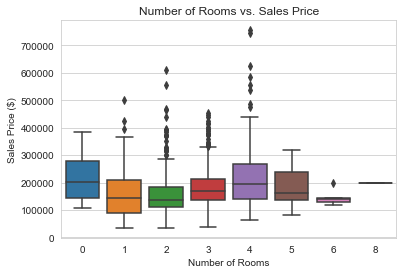

In [61]:
import seaborn as sns
import pandas as pd

data = house_train[['BedroomAbvGr', 'SalePrice']]

# create the box plot using seaborn
sns.boxplot(x="BedroomAbvGr", y="SalePrice", data=data)

# set the title and axis labels
plt.title("Number of Rooms vs. Sales Price")
plt.xlabel("Number of Rooms")
plt.ylabel("Sales Price ($)")

# display the plot
plt.show()

In [ ]:
Data exploratory
Feature Engineering
Feature Selection
Model traing
Model Evaluation

In [66]:
data = house_train[['BedroomAbvGr', 'SalePrice']]

# perform one-hot encoding on the "Number_rooms" column
one_hot = pd.get_dummies(data["BedroomAbvGr"], prefix="num_rooms")

# concatenate the original data with the new one-hot encoded columns
data = pd.concat([data, one_hot], axis=1)

# drop the original "Number_rooms" column since it's no longer needed
data = data.drop("BedroomAbvGr", axis=1)

# display the modified dataset
data

,SalePrice,num_rooms_0,num_rooms_1,num_rooms_2,num_rooms_3,num_rooms_4,num_rooms_5,num_rooms_6,num_rooms_8
0,208500,0,0,0,1,0,0,0,0
1,181500,0,0,0,1,0,0,0,0
2,223500,0,0,0,1,0,0,0,0
3,140000,0,0,0,1,0,0,0,0
4,250000,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1455,175000,0,0,0,1,0,0,0,0
1456,210000,0,0,0,1,0,0,0,0
1457,266500,0,0,0,0,1,0,0,0
1458,142125,0,0,1,0,0,0,0,0


In [67]:
house_train[['BedroomAbvGr', 'SalePrice']]

,BedroomAbvGr,SalePrice
0,3,208500
1,3,181500
2,3,223500
3,3,140000
4,4,250000
...,...,...
1455,3,175000
1456,3,210000
1457,4,266500
1458,2,142125


In [70]:
len(house_train['SalePrice'].unique())

663

In [7]:
house_test = pd.read_csv('/Users/gabrielvictorgomesferreira/Library/CloudStorage/OneDrive-GrandViewUniversity/ML_Projects/house_prices_predictions/data/test.csv')

In [9]:
print(house_test.shape)
house_test.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [13]:
house_sample = pd.read_csv('/Users/gabrielvictorgomesferreira/Library/CloudStorage/OneDrive-GrandViewUniversity/ML_Projects/house_prices_predictions/data/sample_submission.csv')


In [14]:
print(house_sample.shape)
house_sample.head()

(1459, 2)


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [15]:
X = house_train[['LotArea', 'GrLivArea','BedroomAbvGr','TotRmsAbvGrd']]
Y = house_train['SalePrice']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=.2)

In [43]:
X_train

,LotArea,GrLivArea,BedroomAbvGr,TotRmsAbvGrd
1276,12936,1395,3,6
1431,4928,958,2,5
1448,11767,1346,2,6
650,8125,1665,3,7
700,14331,1800,3,7
...,...,...,...,...
214,10900,1392,3,6
133,6853,1296,2,6
411,34650,1056,3,5
720,6563,1742,2,5


In [44]:
y_train

1276    162000
1431    143750
1448    112000
650     205950
700     312500
         ...  
214     161750
133     220000
411     145000
720     275000
675     148500
Name: SalePrice, Length: 1168, dtype: int64

In [45]:
X_test

,LotArea,GrLivArea,BedroomAbvGr,TotRmsAbvGrd
150,10356,969,3,5
504,2308,1322,3,6
1126,3684,1555,2,7
1016,11883,1504,3,6
1161,14778,1640,3,7
...,...,...,...,...
1237,12393,1948,4,8
1056,7052,1364,2,6
104,7758,1818,4,7
691,21535,4316,4,10


In [46]:
y_test

150     122000
504     147000
1126    174000
1016    203000
1161    224000
         ...  
1237    195000
1056    185850
104     169500
691     755000
1293    162900
Name: SalePrice, Length: 292, dtype: int64

In [47]:
#time to creat logistic regression
logreg = LinearRegression().fit(X_train,y_train)

y_prediction = logreg.predict(X_test)

In [50]:
X_test['sale_price_predictions'] = y_prediction
X_test.head()

<ipython-input-50-fc38d7dfdf55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['sale_price_predictions'] = y_prediction


,LotArea,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,sale_price_predictions
150,10356,969,3,5,109109.432742
504,2308,1322,3,6,147892.645337
1126,3684,1555,2,7,206133.434915
1016,11883,1504,3,6,175150.926265
1161,14778,1640,3,7,196270.400968


### Model Evaluation

In [51]:
mean_squared_error(y_test,y_prediction,squared=False)

50999.7533269648

In [ ]:
r-squred